<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/7%20days%20of%20code%20ML/7_DAYS_OF_CODE__ARQUIVO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://user-images.githubusercontent.com/87787728/233119769-ed46065d-d0a5-4b36-bf56-7ac0c68800c1.png" alt="Exemplo de imagem" />
</p>


# Projeto: Desafio 7DAYSOFCODE ML

Autor: Henrique Rezer Mosquér
Data de Criação: 12/04/2023
Data de Atualização: 19/04/2023

## Descrição do Projeto

Este projeto refere-se ao desafio 7DAYSOFCODE da Alura, o qual consiste em desafios diários por 7 dias, passando por todos os passos da construção de um modelo de ML.

Com objetivo classificar a popularidade das músicas, na base de dados do spotify.


## Next Steps 

A classe popularidade, é um valor float de 0 até 100, neste projeto está classe foi transformada para 0 e 1, com valores acima de 65 = 1 e menores que 65 = 0. 
Para próximos trabalhos, podemos abordar mais classes, e criar mais categorias, e não somente duas.

In [1]:
from datetime import date

print("Data de Execução:", date.today())

Data de Execução: 2023-04-19


# 🔎 Ánalise Exploratória 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/7%20days%20of%20code%20ML/dataset.csv')
data= data.drop('Unnamed: 0', axis = 1)
data.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
data.dropna() #remove todos os dados nulos 
data = data.drop_duplicates() #remove todos os itens duplicados 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113550 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113550 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113550 non-null  int64  
 5   duration_ms       113550 non-null  int64  
 6   explicit          113550 non-null  bool   
 7   danceability      113550 non-null  float64
 8   energy            113550 non-null  float64
 9   key               113550 non-null  int64  
 10  loudness          113550 non-null  float64
 11  mode              113550 non-null  int64  
 12  speechiness       113550 non-null  float64
 13  acousticness      113550 non-null  float64
 14  instrumentalness  113550 non-null  float64
 15  liveness          113550 non-null  float64
 16  valence           11

In [ ]:
!pip install missingno
import missingno as msno

msno.matrix(data,color=(1, 0.6, 0) );

In [ ]:
popular_artists = data.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
popular_artists

In [ ]:
popular_artists.plot.barh() ##visualize the data
plt.title("TOP 5 Most Popular Artists")
plt.show()

In [ ]:
long_songs = data[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

In [ ]:
sns.barplot(x="duration_ms", y="track_name", data= long_songs)
plt.title("Top 5 Longest songs")
plt.show()

In [ ]:
trend_genre = data[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre

In [ ]:
sns.barplot(x="track_genre",y="popularity", data=trend_genre)
plt.title("Top trending genre")
plt.show()

In [ ]:
danceable = data[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

In [ ]:
plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name)
plt.title("Top 5 Most Danceable Songs")
plt.show()

In [ ]:
data.describe()

In [ ]:
corr_table = data.corr(method="pearson")

In [ ]:
###plotting the correlation table using seaborn
plt.figure(figsize=(16,4))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between variables")
plt.show() #display the plot

In [ ]:
!pip install sweetviz
import sweetviz as sv



eda = sv.analyze(source = data, target_feat = 'popularity')
eda.show_notebook()

# 🛠️ Pré-Processamento

In [ ]:
plt.hist(x=data['popularity'])

In [ ]:
sns.boxplot(data['duration_ms']);

In [4]:
data.drop(data[data['duration_ms'] >= 450000].index, inplace = True)

condicoes = [data['popularity'] >= 65, data['popularity'] < 65]
valores = [1, 0]
data['popularity'] = np.select(condicoes, valores)
data['popularity'] = data['popularity'].astype(int)

In [ ]:
sns.boxplot(data['duration_ms']);

In [6]:
# Somente colunas quantitativas e que são importantes para o modelo

df_quantitative = data
cols_to_drop = []
for column in data:
    if data[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = data.drop(columns=cols_to_drop)

print(f"Tamanho do dataset que vamos trabalhar: {df_quantitative.shape}")
df_quantitative = df_quantitative.drop(columns=['explicit'])

Tamanho do dataset que vamos trabalhar: (110880, 15)


In [7]:
df_quantitative_nm=(df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())
df_quantitative_nm

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.0,0.512666,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8
1,0.0,0.332515,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8
2,0.0,0.468571,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8
3,1.0,0.448806,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6
4,1.0,0.441960,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.0,0.855679,0.174619,0.2350,0.454545,0.612952,1.0,0.043731,0.642570,0.928000,0.0863,0.034070,0.517705,1.0
113996,0.0,0.855681,0.176650,0.1170,0.000000,0.577345,0.0,0.041554,0.997992,0.976000,0.1050,0.035176,0.350242,0.8
113997,0.0,0.603346,0.638579,0.3290,0.000000,0.714648,0.0,0.043523,0.870482,0.000000,0.0839,0.746734,0.543933,0.8
113998,0.0,0.630966,0.595939,0.5060,0.636364,0.714759,1.0,0.030777,0.382530,0.000000,0.2700,0.415075,0.558651,0.8


# ➗ Divisão do nossos DADOS em (treino e teste)

Importando bibliotecas

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [9]:
# Separando os dados para treino e teste
df_train, df_test = train_test_split(df_quantitative_nm, test_size=0.2, random_state=42, shuffle=True)

In [10]:
# visualizando as proporções da variável alvo
df_train.popularity.value_counts(normalize=True)

0.0    0.914739
1.0    0.085261
Name: popularity, dtype: float64

In [11]:
# dividindo X e y
X = df_train.drop('popularity', axis=1)
y = df_train.popularity

# separando os dados mantendo a porcentagem de amostras em cada classe
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [12]:
# looping para separar os dados em treino e validação
for train_index, val_index in StratifKfold.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [13]:
# checando as proporções da classe 1 na divisão
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para classe=1: {round(len(df_train[df_train.popularity==1]) / df_train.shape[0], 4)}\n")
print(f"Proporção de X_train para classe=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proporção de X_val para classe=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensões: ((70964, 13), (17740, 13), (70964,), (17740,))

Proporção do df_train para classe=1: 0.0853

Proporção de X_train para classe=1:  0.0853
Proporção de X_val para classe=1:    0.0852


# 🌡 Definindo um modelo Básico

Um modelo baseline (ou modelo de referência) é um modelo simples que fornece um ponto de partida para o desenvolvimento de modelos mais avançados em um problema de machine learning. Geralmente, é um modelo simples que é fácil de implementar e que usa uma abordagem de modelagem básica, como a média ou a moda, para prever uma variável alvo.

O modelo baseline é usado para avaliar a eficácia de modelos mais avançados, comparando suas métricas de desempenho, como precisão ou recall, com as do modelo de referência. Se um modelo mais avançado não superar significativamente o modelo baseline, pode ser considerado ineficaz ou desnecessariamente complexo.

O modelo baseline também é útil para estabelecer um ponto de comparação com outros modelos desenvolvidos pela comunidade científica em uma determinada área. Por exemplo, um modelo baseline pode ser estabelecido para um conjunto de dados público e, em seguida, os modelos desenvolvidos pelos pesquisadores podem ser comparados com o modelo de referência para avaliar o avanço em relação ao estado da arte.

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:

# Instanciando o modelo
logReg = LogisticRegression()

# Treinando o modelo
logReg.fit(X_train, y_train)

# Prevendo nos dados de treino
y_pred_base_train = logReg.predict(X_train)

# Prevendo nos dados de validação
y_pred_base_val = logReg.predict(X_val)

In [16]:
df_coef = df_quantitative_nm.drop(columns='popularity')
df_coef.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [17]:
data = {
    "Features": df_coef.columns,
    "Coef": logReg.coef_.tolist()[0]
}

df = pd.DataFrame(data)
df

,Features,Coef
0,duration_ms,-0.100437
1,danceability,0.980946
2,energy,-1.225153
3,key,0.045963
4,loudness,3.181279
5,mode,-0.108705
6,speechiness,-1.371848
7,acousticness,-0.974692
8,instrumentalness,-1.721506
9,liveness,-1.236400


In [18]:
from sklearn.metrics import accuracy_score
print('Acurácia do modelo é: ', round(accuracy_score(y_val, y_pred_base_val),2) * 100, '%')

Acurácia do modelo é:  91.0 %


In [19]:
from sklearn.metrics import f1_score
f1_score(y_val, y_pred_base_val, average='macro')

0.4777437588318417

In [20]:
from sklearn.metrics import recall_score
recall_score(y_val, y_pred_base_val, average='macro')

0.5

/usr/local/lib/python3.9/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


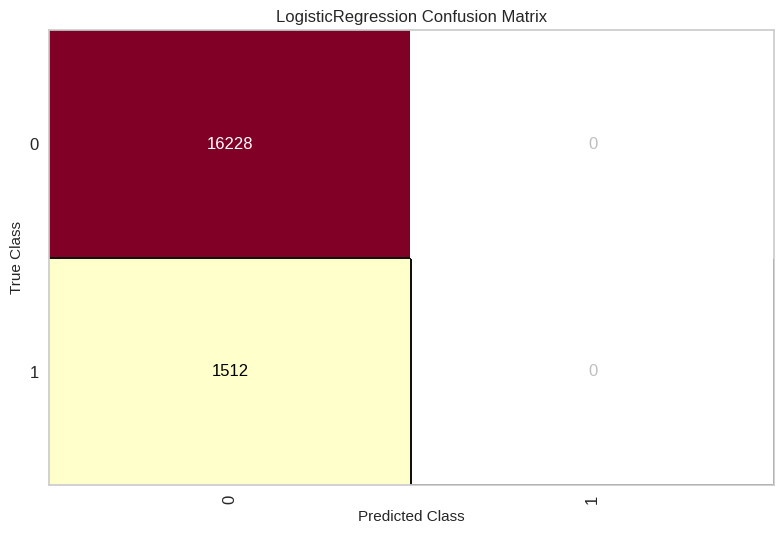

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logReg, classes=[0,1])
cm.score(X_val, y_val)
cm.show()

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred_base_val)

array([[16228,     0],
       [ 1512,     0]])

In [23]:
from sklearn.metrics import precision_score
print('Nos dados de TREINO:')

print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('Nos dados de VALIDAÇÃO:')
print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)

Nos dados de TREINO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9147314131108731
precision: 0.0
recall:    0.0
f1:        0.0

------------------------------------------------------------
------------------------------------------------------------

Nos dados de VALIDAÇÃO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9147688838782413
precision: 0.0
recall:    0.0
f1:        0.0
------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 🎲 Reamostragem, teste e validação

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Dicionário dos classificadores
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

## Distribuição

In [25]:
# Reamostragem dos dados
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from collections import Counter

# instanciando o método
undersample = NearMiss()

# transformando o conjunto de dados
X_under, y_under = undersample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under)
print(counter)

Counter({0.0: 6051, 1.0: 6051})


In [26]:
for nome, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.296054114994363
precision: 0.06997335840777308
recall:    0.5906084656084656
f1:        0.1251226005324366
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.34870349492671926
precision: 0.08053467000835422
recall:    0.6375661375661376
f1:        0.14300548879988131
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.3390642615558061
precision: 0.09851403412217942
recall:    0.8287037037037037
f1:        0.17609444171175603
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.23573844419391207
precision: 0.08876143656971186
recall:    0.8597883597883598
f1:        0.16091100383710855
--------------------------------

## Distribuição (Random Over-Sampling)

In [27]:

# instanciando o método
oversample = RandomOverSampler(sampling_strategy='minority')

# transformando o conjunto de dados
X_over, y_over = oversample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_over)
print(counter)

Counter({0.0: 64913, 1.0: 64913})


In [28]:

for nome, model in classifiers.items():
    
    model.fit(X_over, y_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.5332018038331454
precision: 0.12146292361033441
recall:    0.7182539682539683
f1:        0.20778723811346025
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.8327508455467869
precision: 0.2838038632986627
recall:    0.6316137566137566
f1:        0.3916342013532909
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9060879368658399
precision: 0.4589989350372737
recall:    0.5701058201058201
f1:        0.5085545722713865
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.946054114994363
precision: 0.7744807121661721
recall:    0.5178571428571429
f1:        0.6206896551724137
---------------------------------------

# 📝 Avaliação dos modelos

In [29]:

# transformando os dados
X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values

In [30]:

#HIPERPARÂMETROS PARA RANDOM FOREST

# número de árvores
n_estimators = [3,5,10,100]

# número de features para considerar em cada split
max_features = [3,4,5,6,None]

# número máximo de níveis da árvore
max_depth = [3,4,5,6,None]

# pesos para cada classe
class_weight = ['balanced',None]

# colocando os parametros definidos em um dicionário
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

# exibindo os parâmetros
print(random_grid)

{'n_estimators': [3, 5, 10, 100], 'max_features': [3, 4, 5, 6, None], 'max_depth': [3, 4, 5, 6, None], 'class_weight': ['balanced', None]}


# 🌳 Random Forest + Distribuição (Random Over-Sampling)


In [31]:
from sklearn.model_selection import RandomizedSearchCV
import time
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# definindo listas vazias para receber os resultados da validação cruzada
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []


# instanciando o RandomizedSearchCV para validação cruzada com o grid de parametros
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

# iniciando o tempo e contador para o loop
start = time.time()
count = 0

# looping para a validação cruzada
for train, test in StratifKfold.split(X_train_array, y_train_array):
    
    # instanciando o pipeline com técnica de reamostragem
    pipeline_rf = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), rf_grid)
    
    # executando o pipeline para treinar o modelo
    model_rf = pipeline_rf.fit(X_train_array[train], y_train_array[train])
    
    # identificando os melhores parâmetros no treinamento
    best_est_rf = rf_grid.best_estimator_
    
    # realizando as previsões com o resultado do treinamento
    prediction_rf = best_est_rf.predict(X_train_array[test])
    
    # armazenando os resultados
    accuracy_lst_rf.append(pipeline_rf.score(X_train_array[test], y_train_array[test]))
    precision_lst_rf.append(precision_score(y_train_array[test], prediction_rf))
    recall_lst_rf.append(recall_score(y_train_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_array[test], prediction_rf))
    
    # identificando em qual loop está
    count = count + 1
    print(f"kfold nº: {count}")
    
    # medindo o tempo de cada loop
    intervalo = time.time()
    print(f"tempo intermediário: {(intervalo - start)/60:.1f} minutos")
    print()

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")

# imprimindo a média dos resultados da validação cruzada
print('---' * 20)
print('Resultados')
print(f"accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"precision: {np.mean(precision_lst_rf)}")
print(f"recall:    {np.mean(recall_lst_rf)}")
print(f"f1:        {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# imprimindo o tempo total da validação cruzada
end = time.time()
print(f"Tempo do loop para validação cruzada: {(end - start)/60:.1f} minutos")

kfold nº: 1
tempo intermediário: 6.9 minutos

kfold nº: 2
tempo intermediário: 13.8 minutos

kfold nº: 3
tempo intermediário: 20.7 minutos

kfold nº: 4
tempo intermediário: 27.6 minutos

kfold nº: 5
tempo intermediário: 34.5 minutos

------------------------------------------------------------
melhores estimadores para RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}
------------------------------------------------------------
Resultados
accuracy:  0.9401950391411174
precision: 0.7443070494986138
recall:    0.4551288123332264
f1:        0.5648052131972945
AUC:       0.7202700487669474
------------------------------------------------------------
Tempo do loop para validação cruzada: 34.5 minutos


## Avaliação 

<ipython-input-34-5c3f93027d77>:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-34-5c3f93027d77>:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-34-5c3f93027d77>:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-34-5c3f93027d77>:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-34-5c3f93027d77>:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


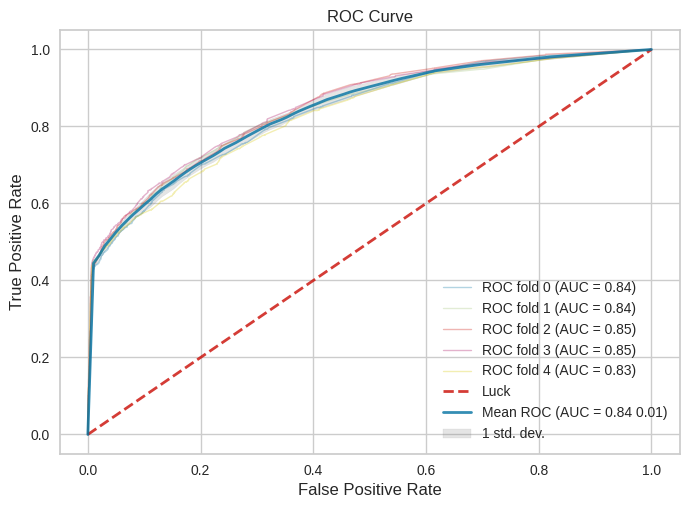

In [34]:
from scipy import interp
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve

# criando uma função para plotar o gráfico
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # definindo algumas listas vazias para receber o resultado
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # definindo o contador
    i = 0
    
    # loop ara validação cruzada
    for train, test in cv.split(X, y):
        
        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        # computando a curva ROC e AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # plotando a curva ROC da validação cruzada em individualmente
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    
    # plotando a linha diagonal como referência da taxa de 50/50
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # calculando as médias e desvio padrão
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # plotando curva ROC com a média dos resultados
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'1 std. dev.')
    
    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # exibindo o gráfico
    plt.show()
    
# executando função e plotando a Curva ROC AUC
draw_cv_roc_curve(best_est_rf, StratifKfold, X_train, y_train, title='ROC Curve')

# 🥋 modelo final 

In [35]:
# separando novamente os dados
X_all = df_train.drop('popularity', axis=1)
y_all = df_train.popularity

# instanciando o modelo final com os parametros encontrados na validação cruzada
final_model = rf_grid.best_estimator_

# definindo o pipeline para reamostragem oversampling e o modelo final
pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), final_model)

# treinando o modelo com os parametros ajustados com todos os dados
model = pipeline.fit(X_all, y_all)

In [36]:
model.steps[1]

('randomforestclassifier',
 RandomForestClassifier(class_weight='balanced', max_features=6))

In [37]:
lista = model.steps[1][1].feature_importances_

In [38]:
print(lista.tolist())

[0.09410428561366595, 0.08918446722112083, 0.09599870968647449, 0.04102911999684173, 0.09997283790745488, 0.008488622340435119, 0.09120595591225289, 0.100380802639704, 0.09551751411985118, 0.09491209912893717, 0.09255152276535117, 0.089984233685784, 0.006669828982126619]


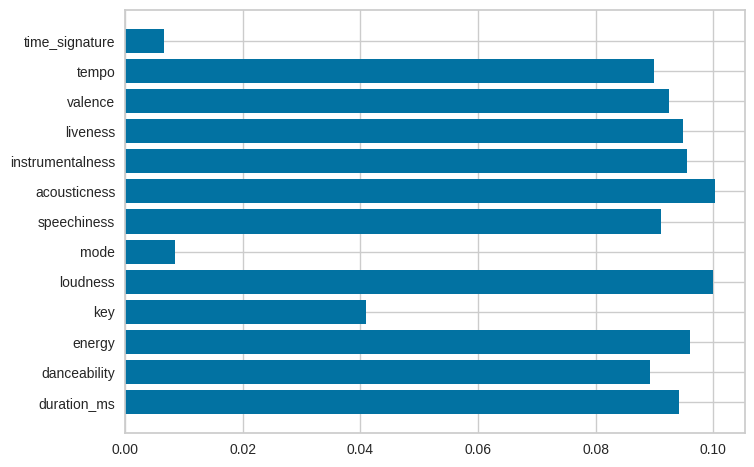

In [40]:
# lista de nomes
nomes = df_quantitative_nm.columns

plt.barh(df_quantitative_nm.drop(columns=['popularity']).columns.tolist(), lista.tolist())

plt.show()

 
# ✅ Preparação, previsão e avaliação nos dados de teste

In [41]:

# separando os dados de teste
X_test = df_test.drop('popularity', axis=1)
y_test = df_test.popularity

# realizando as predições nos dados de teste
y_pred_test = model.predict(X_test)

# imprimindo os resultados
print(f"accuracy:  {accuracy_score(y_test, y_pred_test)}")
print(f"precision: {precision_score(y_test, y_pred_test)}")
print(f"recall:    {recall_score(y_test, y_pred_test)}")
print(f"f1:        {f1_score(y_test, y_pred_test)}")

accuracy:  0.9549512987012987
precision: 0.8061959654178674
recall:    0.6051919956733369
f1:        0.6913809082483781


In [42]:
pd.DataFrame(index=['Baseline', 'Validação', 'Teste'], 
             data = {"accuracy": [accuracy_score(y_val, y_pred_base_val), np.mean(accuracy_lst_rf), accuracy_score(y_test, y_pred_test)], 
                     "precision": [precision_score(y_val, y_pred_base_val), np.mean(precision_lst_rf), precision_score(y_test, y_pred_test)],
                     "recall": [recall_score(y_val, y_pred_base_val), np.mean(recall_lst_rf), recall_score(y_test, y_pred_test)],
                     "f1": [f1_score(y_val, y_pred_base_val), np.mean(f1_lst_rf), f1_score(y_test, y_pred_test)]}
            )

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1
Baseline,0.914769,0.000000,0.000000,0.000000
Validação,0.940195,0.744307,0.455129,0.564805
Teste,0.954951,0.806196,0.605192,0.691381


In [43]:
# armazenando as previsões no dataframe de teste
df_test['Predicted'] = y_pred_test

# comparando com real com o previsto no dataframe
df_test['Correct?'] = np.where(df_test['popularity'] == df_test['Predicted'], 'Yes', 'No')

In [48]:
df_test

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Predicted,Correct?
54416,0.0,0.677410,0.146193,0.375,0.727273,0.626029,1.0,0.052021,0.158635,0.972000,0.1120,0.032462,0.568981,0.6,0.0,Yes
53315,0.0,0.403899,0.696447,0.856,0.818182,0.865916,0.0,0.044145,0.089960,0.000000,0.0648,0.736683,0.509496,0.8,0.0,Yes
33700,0.0,0.315408,0.834518,0.345,0.727273,0.758541,0.0,0.080311,0.194779,0.000000,0.1190,0.331658,0.472224,0.8,0.0,Yes
33755,0.0,0.270871,0.521827,0.661,0.181818,0.814716,0.0,0.254922,0.451807,0.000000,0.1710,0.485427,0.331201,0.8,0.0,Yes
53647,0.0,0.567874,0.677157,0.717,0.090909,0.819803,0.0,0.036166,0.193775,0.000000,0.1040,0.497487,0.443790,0.8,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66584,0.0,0.439280,0.923858,0.650,1.000000,0.739841,0.0,0.120207,0.015462,0.063400,0.2290,0.401005,0.558688,0.8,0.0,Yes
54576,0.0,0.668956,0.716751,0.917,0.909091,0.745427,1.0,0.061140,0.331325,0.843000,0.2660,0.645226,0.493265,0.8,0.0,Yes
99502,0.0,0.540524,0.548223,0.455,0.181818,0.779295,1.0,0.026425,0.610442,0.000000,0.3460,0.204020,0.308326,0.8,0.0,Yes
12410,0.0,0.207242,0.495431,0.585,0.000000,0.698703,1.0,0.066114,0.414659,0.080000,0.8900,0.257286,0.242325,0.8,0.0,Yes
